<h1><center>Students performance and difficulties prediction</center></h1>

<img src='http://www.inpt.ac.ma/sites/default/files/article/image/inpt%20_0.png' width="242" height="42" style="float:right">
<h3>Project Advisor:</h3>

<a href='https://www.linkedin.com/in/amina-radgui-88017424/' style="text-decoration: none">Prof. RADGUI Amina</a>
    
<h3>Working team:</h3>
    
<a href='https://www.linkedin.com/in/mohammed-al-jadd-a540281b7/' style="text-decoration: none">AL JADD Mohammed</a>
    
<a href='https://www.linkedin.com/in/hafssa-boujida-248aa5202/' style="text-decoration: none">BOUJIDA Hafssa</a>
    
<a href='https://www.linkedin.com/in/nouhaila-elnabaoui-b43b8b19b/' style="text-decoration: none">EL NABAOUI Nouhaila</a>
    
    
    
    

<img src='plots\project.cover\cover.png' width="600" height="600">

In this notebook, we will  :

- Predict whether or not a student will pass the final exam based on certain information given
- Compare the three learning algorithms
- Find out what most affects student achievement
- Find the best algorithm with high accuracy

We will be using three learning algorithms:

- Logistic regression
- Supported vector machine
- KNN

# Reading data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table


df = pd.read_csv('student-data.csv')
dfv = pd.read_csv('student-data.csv')

# Data

**Before process the data let's describe it briefly:**
- Source : **Paulo Cortez, University of Minho, GuimarÃ£es, Portugal**, http://www3.dsi.uminho.pt/pcortez

- This data approach student achievement in secondary education of two Portuguese schools.

- The shape of our data set is **(395 rows × 31 columns)**.

- **No missing** values in the data.

- The data attributes **include demographic**, social and school related features and it was collected by using school reports and questionnaires.

- **The last column tell us whether a student passed the final exam or not**.

- The dataset is taken from : https://archive.ics.uci.edu/ml/datasets/student+performance

**Now let's explain every column in the dataframe**
- `school` : student's school (binary: "GP" or "MS")
- `sex` : student's sex (binary: "F" - female or "M" - male)
- `age` : student's age (numeric: from 15 to 22)
- `address` : student's home address type (binary: "U" - urban or "R" - rural)
- `famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- `Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian` : student's guardian (nominal: "mother", "father" or "other")
- `traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- `famsup` : family educational support (binary: yes or no)
- `paid` : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` : extra-curricular activities (binary: yes or no)
- `nursery` : attended nursery school (binary: yes or no)
- `higher` : wants to take higher education (binary: yes or no)
- `internet` : Internet access at home (binary: yes or no)
- `romantic` : with a romantic relationship (binary: yes or no)
- `famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` : current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` : number of school absences (numeric: from 0 to 93)

**The last column:**
- `passed` : did the student pass the final exam (binary: yes or no)

**Displaying the dataset**

In [2]:
df.iloc[0:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


## Data processing

In [3]:
# mapping strings to numeric values:
def numerical_data():
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = df['passed']
    del df['passed']
    df['passed'] = col

    
# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col


# This function will transform dataframe to a numpy array and split it into training set, test set and cross validation set :
def split(df,rest_size,test_size,randomState):
    data = df.to_numpy()
    n = data.shape[1]
    x = data[:,0:n-1]
    y = data[:,n-1]
    if(randomState):
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=randomState)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=randomState)
    else:
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=0)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=0)
    
    return X_train,X_val,X_test,y_train,y_val,y_test

**digitization of values**

In [4]:
# All values in numerical after calling numerical_data() function
numerical_data()
df.iloc[0:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,1,18,0,1,1,4,4,3,0,...,0,0,4,3,4,1,1,3,6,0
1,0,1,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,4,0
2,0,1,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,10,1
3,0,1,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,1
4,0,1,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,4,1


**Features scalling**

In [5]:
feature_scaling(df)

# Now we are ready for models training
df.iloc[0:3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.0,...,0.0,0.0,0.75,0.5,0.75,0.00,0.0,0.5,0.003882,0.0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.0,...,1.0,0.0,1.00,0.5,0.50,0.00,0.0,0.5,-0.022785,0.0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.0,...,1.0,0.0,0.75,0.5,0.25,0.25,0.5,0.5,0.057215,1.0


## Data visualisation

##### 1) data inspection

In [50]:
df.shape

(395, 31)

In [51]:
df.dropna().shape # their is no null value "fortunately:)"

(395, 31)

In [50]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

##### 2) Now let's visualise the data and look deeper into each features

In [51]:
features=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

a) boxplot:

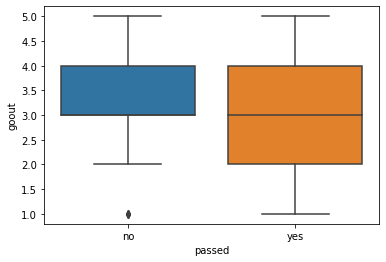

In [52]:
sns.boxplot(x="passed", y="goout",  data=dfv)

In [53]:
# it seems that even people with low number of gout hours failed the exam

 b) Distribution of categorical features

     -for school Distribution

In [220]:
dfv["school"].unique()

array(['GP', 'MS'], dtype=object)

Text(0.5, 1.0, 'School Distribution')

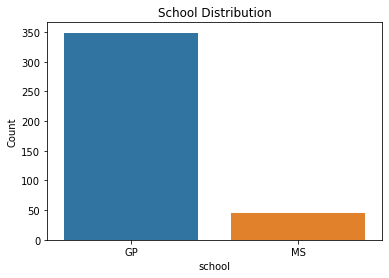

In [221]:
f,fx = plt.subplots() 
figure = sns.countplot(x = 'school', data=dfv, order=['GP','MS'])
fx = fx.set(ylabel="Count", xlabel="school")
figure.grid(False)
plt.title('School Distribution')

      -for gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

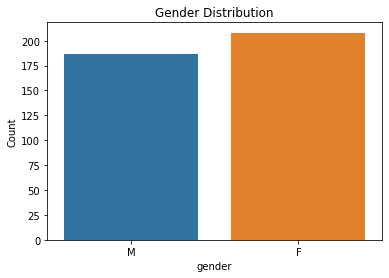

In [222]:
f, fx = plt.subplots()
f = sns.countplot(x = 'sex', data=dfv, order=['M','F'])
fx = fx.set(ylabel="Count", xlabel="gender")
f.grid(False)
plt.title('Gender Distribution')

     -for Address Distribution

Text(0.5, 1.0, 'Address Distribution')

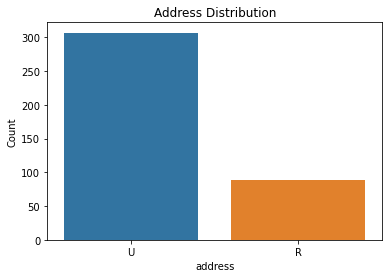

In [223]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'address', data=dfv, order=['U','R'])
fx = fx.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')

    -for family Distribution

In [224]:
dfv["famsize"].unique()

array(['GT3', 'LE3'], dtype=object)

Text(0.5, 1.0, 'Family Distribution')

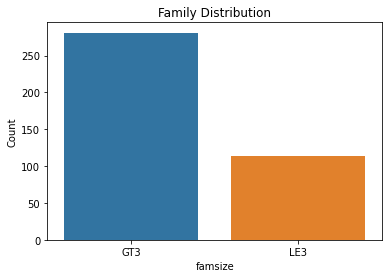

In [225]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'famsize', data=dfv, order=['GT3','LE3'])
fx = fx.set(ylabel="Count", xlabel="famsize")
figure.grid(False)
plt.title('Family Distribution')

          -Parents status Distribution

Text(0.5, 1.0, 'Parents status Distribution')

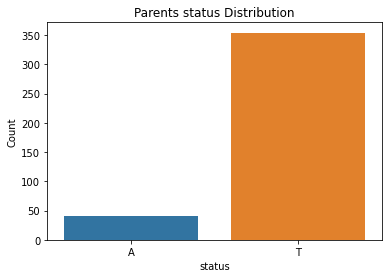

In [226]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'Pstatus', data=dfv, order=['A','T'])
fx = fx.set(ylabel="Count", xlabel="status")
figure.grid(False)
plt.title('Parents status Distribution')   

     -School Support Distribution

Text(0.5, 1.0, 'School Support Distribution')

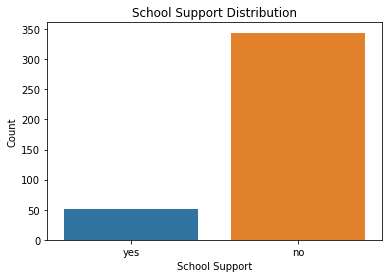

In [227]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'schoolsup', data=dfv, order=['yes','no'])
fx = fx.set(ylabel="Count", xlabel="School Support")
figure.grid(False)
plt.title('School Support Distribution')

    -Family Support Distribution

Text(0.5, 1.0, 'Family Support Distribution')

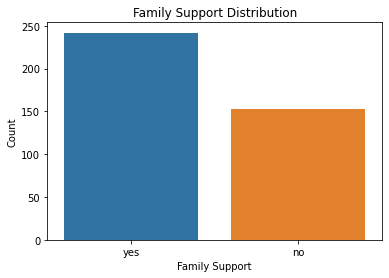

In [228]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'famsup', data=dfv, order=['yes','no'])
fx = fx.set(ylabel="Count", xlabel="Family Support")
figure.grid(False)
plt.title('Family Support Distribution')

    -for extra paid distribution

Text(0.5, 1.0, 'Extra paid classes Distribution')

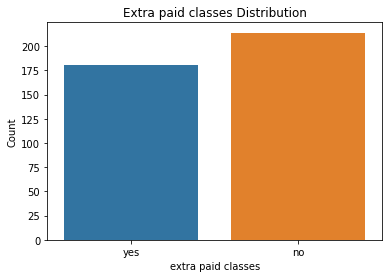

In [229]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'paid', data=dfv, order=['yes','no'])
fx = fx.set(ylabel="Count", xlabel="extra paid classes")
figure.grid(False)
plt.title('Extra paid classes Distribution')

    - Students who want to take higher education Distribution

Text(0.5, 1.0, 'Students who want to take higher education Distribution')

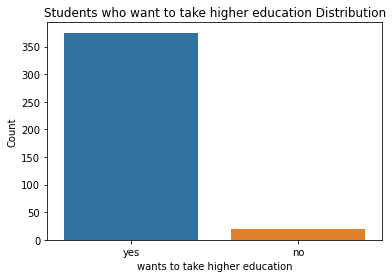

In [230]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'higher', data=dfv, order=['yes','no'])
fx = fx.set(ylabel="Count", xlabel="wants to take higher education")
figure.grid(False)
plt.title('Students who want to take higher education Distribution')

    -  internet Accessibility at home Distribution

Text(0.5, 1.0, 'Internet access at home Distribution')

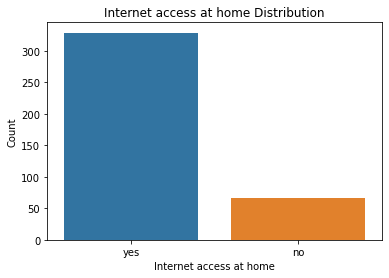

In [231]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'internet', data=dfv, order=['yes','no'])
fx = fx.set(ylabel="Count", xlabel="Internet access at home")
figure.grid(False)
plt.title('Internet access at home Distribution')

       -Students with a romantic relationship Distribution

Text(0.5, 1.0, 'Students with a romantic relationship Distribution')

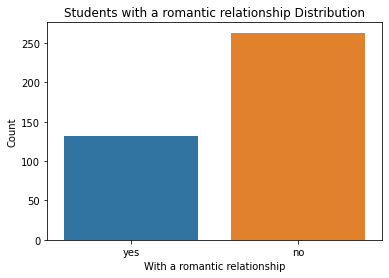

In [232]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'romantic', data=dfv, order=['yes','no'])
fx = fx.set(ylabel="Count", xlabel="With a romantic relationship")
figure.grid(False)
plt.title('Students with a romantic relationship Distribution')

 c) Distribution of  features with multiple categoric 

               - Parent_Education_Distribution

In [233]:
#(numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

In [234]:
dfv["Medu"].unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [235]:
dfv["Fedu"].unique()

array([4, 1, 2, 3, 0], dtype=int64)

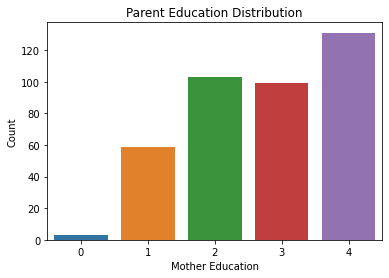

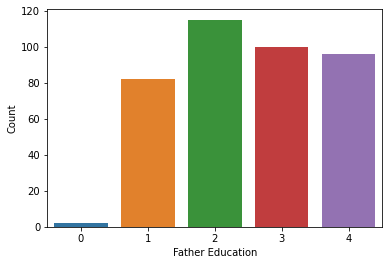

In [236]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'Medu', data=dfv, order=[0,1,2,3,4])
fx = fx.set(ylabel="Count", xlabel="Mother Education")
figure.grid(False)
plt.title('Parent Education Distribution')
   
f, fx = plt.subplots()
figure = sns.countplot(x = 'Fedu', data=dfv, order=[0,1,2,3,4])
fx = fx.set(ylabel="Count", xlabel="Father Education")
figure.grid(False)

In [237]:
# (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

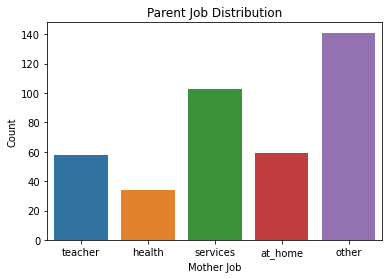

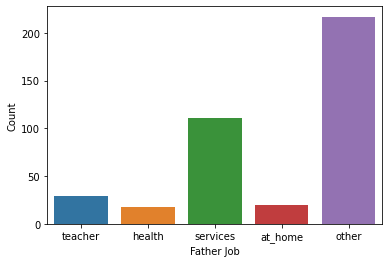

In [238]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=dfv, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)
plt.title('Parent Job Distribution')
   
f, fx = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=dfv, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)

    -travel_time_Distribution

In [239]:
# (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

Text(0.5, 1.0, 'Travel Time Distribution')

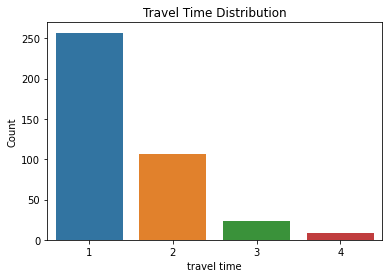

In [240]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'traveltime', data=dfv, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="travel time")
figure.grid(False)
plt.title('Travel Time Distribution')

      -Study Time Distribution

In [241]:
# (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

Text(0.5, 1.0, 'Study Time Distribution')

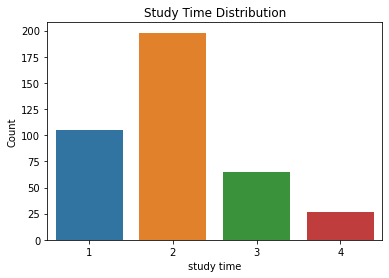

In [242]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'studytime', data=dfv, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="study time")
figure.grid(False)
plt.title('Study Time Distribution')

           -failures Distribution

Text(0.5, 1.0, 'failures Distribution')

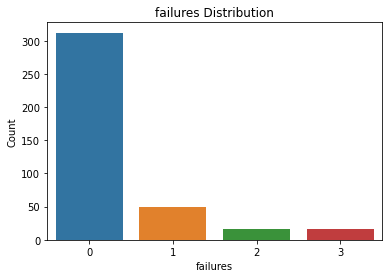

In [243]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=dfv, order=[0,1,2,3])
ax = ax.set(ylabel="Count", xlabel="failures")
figure.grid(False)
plt.title('failures Distribution')

     -family relationship Distribution

Text(0.5, 1.0, 'family relationship Distribution')

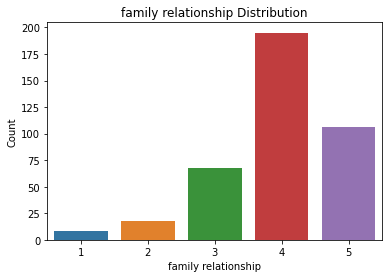

In [244]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famrel', data=dfv, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="family relationship")
figure.grid(False)
plt.title('family relationship Distribution')

     -Free time Distribution

Text(0.5, 1.0, 'Free time Distribution')

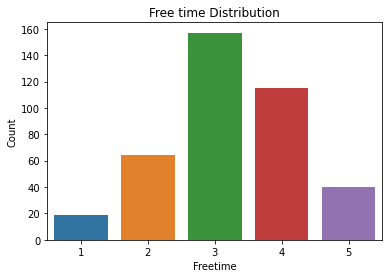

In [245]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'freetime', data=dfv, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Freetime")
figure.grid(False)
plt.title('Free time Distribution')

     -Going Out Distribution
     

Text(0.5, 1.0, 'Going Out Distribution')

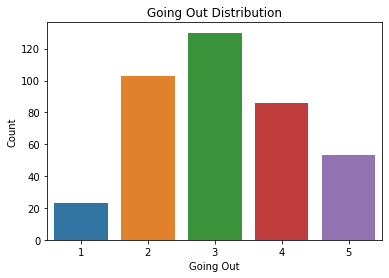

In [246]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'goout', data=dfv, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Going Out")
figure.grid(False)
plt.title('Going Out Distribution')

    -alcohol consumption Distribution

Text(0.5, 1.0, 'Weekend alcohol consumption Distribution')

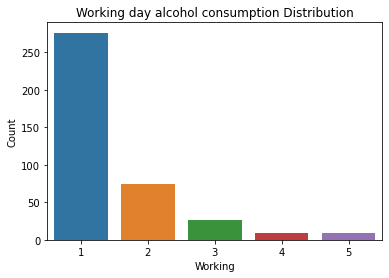

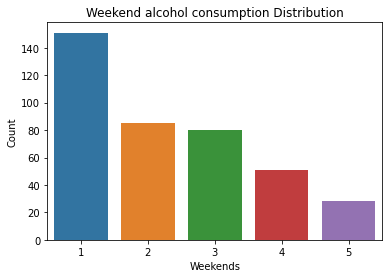

In [247]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Dalc', data=dfv, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Working")
figure.grid(False)
plt.title('Working day alcohol consumption Distribution')

f, ax = plt.subplots()
figure = sns.countplot(x = 'Walc', data=dfv, order=[1,2,3,4,5])
ax = ax.set(ylabel="Count", xlabel="Weekends")
figure.grid(False)
plt.title('Weekend alcohol consumption Distribution')

    -distribution of student status

In [248]:
dfv['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

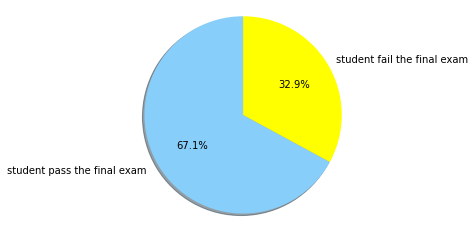

In [249]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

   d) Now leats look at the most impactufull features for student failure
    

                 1-using correlation 
                 

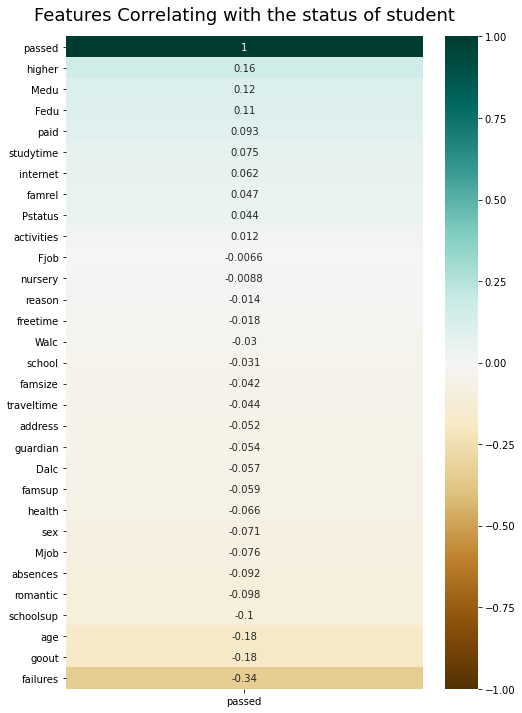

In [250]:
# visualise correlation between student status and other features
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);


it seems that most impactefull elements for student status are :

    _ for negatif impact we had:
    
        -failures
        -goout
        -age
        
    _ for positif impact
    
       -heigher
        -Medu
        -Fedu

# Logistic regression

# 1-Logistic Regression implementation

In [252]:
#réalisé par : Boujida Hafssa :)

In [253]:
#now we are going to plot a scatterplot just to see the data distribution

#à revoir!

In [254]:
# split data train 70 % and test 30 %

data = df.to_numpy()
n = data.shape[1]
x = data[:,0:n-1]
y = data[:,n-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Once our data is split, we can forget about x_test and y_test until we define our model.
#x_train and y_train are the samples we will use to train the model

In [257]:
# let's create a model and train it 

#let's create an object of this class
logisticRegr = LogisticRegression(C=1)

In [258]:
#and now let's do the training

logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1)

In [259]:
#The model is now trained and ready to make predictions :) 

In [260]:
y_pred=logisticRegr.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

# 2- Plotting the decision boundary 

# 3-Model evaluation

In order to evaluate our model , we will first calculate the accuracy of the model , visualize the confusion matrix, and then plot the ROC curve.

In [261]:
#let's have a look at the accuracy of the model

Sctest=logisticRegr.score(x_test,y_test)
Sctrain=logisticRegr.score(x_train,y_train)

print('Accuracy test is: ',Sctest)
print('Accuracy train is: ',Sctrain)

Accuracy test is:  0.6386554621848739
Accuracy train is:  0.7463768115942029


We got two values of the accuracy, one obtained with the training set and other with the test set.

Sctest accuracy= 0.6302521008403361

Sctrain accuracy= 0.7427536231884058

It might be a good idea to compare the two, as a situation where the training set accuracy is much higher might indicate overfitting. The test set accuracy is more relevant for evaluating the performance on unseen data since it’s not biased.

In [262]:
#now, we can get the confusion matrix with confusion_matrix():

confusion_matrix(y_test, y_pred)

array([[12, 38],
       [ 5, 64]], dtype=int64)

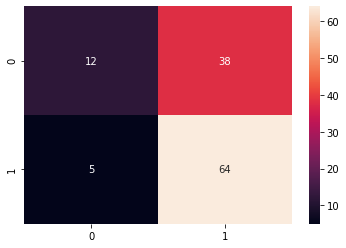

In [263]:
#let's visualize the confusion matrix:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

We can now get the report on classification as a string or dictionary with classification_report():

In [264]:
#import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.24      0.36        50
         1.0       0.63      0.93      0.75        69

    accuracy                           0.64       119
   macro avg       0.67      0.58      0.55       119
weighted avg       0.66      0.64      0.58       119



ROC CURVE

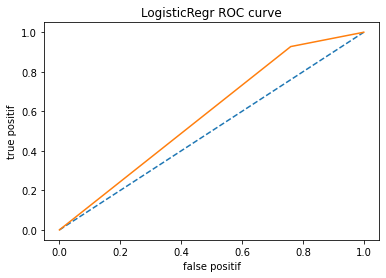

In [265]:
#ploting the roc_curve

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()

In [266]:
#we still need to improve our model in order to be more accurate!

# 4-improving model accuracy

# k-nearest neighbors

In [191]:
# Réalisée par el nabaoui nouhaila

In this section we will discuss how to implement knn and how to get best accuracy using hyperparametters tuning (good lecture:)

In [192]:
#define data
y=df.passed
target=["passed"]
X = df.drop(target,axis = 1 )

### A)**Hyperparameter Tuning**



Before appling the knn algorithme it could be better to choose an optimal value of k,but what is the best method to tun this value ?
Actually There is no straightforward method to calculate the value of K in KNN. We have to play around with different values to choose the optimal value of K. 

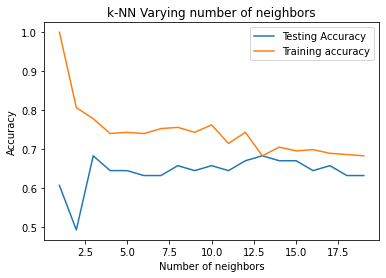

In [193]:
#spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)
#Setup arrays to store training and test accuracies
neighbors= np.arange(1,20)
train_accuracy =np.empty(19)
test_accuracy = np.empty(19)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 


In our case study we had a binary classification sow it could be better to choose an odd value of K.
By looking into the curv we might see that k=13 could be good choise .


**we are going to search for Best parameters(K,metric)  based on time,acc using validation data**


In [194]:
params = {"n_neighbors": np.arange(1, 30), "metric":["euclidean", "manhattan", "chebyshev"]}
acc = {}
i=0

for m in params["metric"]:
    acc[m] = []
    for k in params["n_neighbors"]:
        print("Model_{} metric: {}, n_neighbors: {}".format(i, m, k))
        i += 1
        t = time()
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        print("Time: ", time() - t)
        acc[m].append(accuracy_score(y_test, pred))
        print("Acc: ", acc[m][-1])

Model_0 metric: euclidean, n_neighbors: 1
Time:  0.01300811767578125
Acc:  0.6075949367088608
Model_1 metric: euclidean, n_neighbors: 2
Time:  0.014509201049804688
Acc:  0.4936708860759494
Model_2 metric: euclidean, n_neighbors: 3
Time:  0.011007547378540039
Acc:  0.6835443037974683
Model_3 metric: euclidean, n_neighbors: 4
Time:  0.011005878448486328
Acc:  0.6455696202531646
Model_4 metric: euclidean, n_neighbors: 5
Time:  0.011507034301757812
Acc:  0.6455696202531646
Model_5 metric: euclidean, n_neighbors: 6
Time:  0.01501011848449707
Acc:  0.6329113924050633
Model_6 metric: euclidean, n_neighbors: 7
Time:  0.023015260696411133
Acc:  0.6329113924050633
Model_7 metric: euclidean, n_neighbors: 8
Time:  0.014008522033691406
Acc:  0.6582278481012658
Model_8 metric: euclidean, n_neighbors: 9
Time:  0.01100611686706543
Acc:  0.6455696202531646
Model_9 metric: euclidean, n_neighbors: 10
Time:  0.014008045196533203
Acc:  0.6582278481012658
Model_10 metric: euclidean, n_neighbors: 11
Time:  0

as  We can see that the best metric or distance is manhattan_distance,optimal k=8. This choice  gives heigh Acc=68% with less time consuming compared to other distances(t=0.007990360260009766 s)

## B)Final models implementation

As we discover in privious section the best parameters to implement knn algorithme are:

    -K=13
    
    -metric=euclidian-distance
    

In [195]:
#finale model
knn_f=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
knn_f.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

## C)Model evaluation


**To evaluate our  model we are going to**:

-use heatmap (matrice de confusion )

-use the precision recall and  F1 score for each class

-plotting the roc curve

1)**Confusion matrix**

Accuracy is:  0.6835443037974683


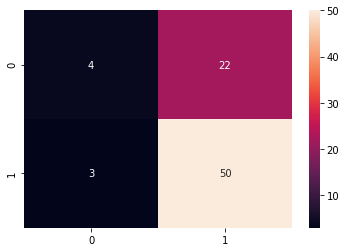

In [196]:
# at first let choose k=11 and evaluate the acquracy:
y_predict=knn_f.predict(X_test)
ac1 = accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac1)
cm= confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)


2)**classification_report**


In [197]:
#import classification_report
from sklearn.metrics import classification_report
y_predict = knn_f.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.57      0.15      0.24        26
         1.0       0.69      0.94      0.80        53

    accuracy                           0.68        79
   macro avg       0.63      0.55      0.52        79
weighted avg       0.65      0.68      0.62        79



3)**Roc_curv**

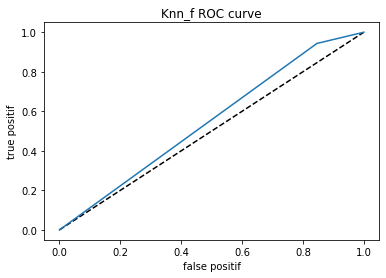

In [198]:
#ploting the roc_curve

fpositif, tpositif, thresholds = roc_curve(y_test, y_predict)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpositif,tpositif, label='knn_f')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('Knn_f ROC curve')
p=plt.show()
     

## D)conclusion :
To conclude after using knn algorithme with(euclidian_distance,k=13) we got a quit good accuracy acc=70%

# Support vector machine 

<h5 style='color:red;font-family:cursive;font-size:4.5mm'>Réalisé par Mohamed AL JADD </h5>
<img src='https://monkeylearn.com/static/b6f30bea411152b138e7d2e5358f89e0/05b00/post_1e_hero.png' width='300cm' height='15cm'>

**First of all let's start with creating some useful functions :** The functions that we will use is :


<h5> 1) Showing results  :</h5>   

 - The first function will help us show the following metrics for any classifer : ROC curve, f1, accuracy, training time, ROC score and confusion matrix
 
```python
    def showResults(accuracy, trainingTime, y_pred,model) 
    ...
    
```    

<h5> 2) Hyperparameters tunning :</h5>

- First of all let's talk about the parameters that we will tune :
    - C : The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.
    
    - d : the degree of pylonomial that map feature to new features (e.g : suppose our hypothesis without polynomial features is $h_{\theta} = \theta_{0}+\theta_{1}.x_{1}$ then with polynomial features with d = 2 we get $h_{\theta} = \theta_{0}+\theta_{1}.x_{1}+\theta_{2}.x_{1}^{2}$).
    
    - $\gamma$ : we talked about it in the  <a href='https://github.com/mohammedAljadd/Students-performance-and-difficulties-prediction#user-content-svm:~:text=Now%20after%20we%20train%20our%20three,by%20the%20model%20as%20support%20vectors.'> Readme file</a>.
    
    - Data splits : we will splits data randomly many times and choose the split that gives better performances. # it takes so long !
- we will use diffrent values of svm parameters and choose the ones who minimize the cost on the cross validation set, later on, we will split the data into three sets.
    
```python    
   def optimal_C_value()
    ...
    def optimal_C_d_values()
    ...
    def optimal_C_gamma_values()
    ...
```   
- This function will plot results of the three svm kernels that we will train :

<h5> 3) Comparison : :</h5>

```python
    def compare_kernels()
    ...
```   
- Show results of the best svm kernel according to the metrics :
```python 
 
    def best_kernel(kernel)
    ...
```

<h5>4) Impact factors :</h5>


- This three function will help us extract positive and negative factors for student performances on exams :

```python
    def factors(array, K, max_or_min, df)
    ...
    def get_factors(index, df)
    ...
    def column_to_string(fcts,max_or_min)
```

<h5>5) Splitting data :</h5>


- This function will split the data into three sets: ($x_{train}$,$y_{train}$), ($x_{cv}$,$y_{cv}$) and ($x_{test}$,$y_{test}$):

```python
    def split(df,rest_size,test_size,randomState)
```
- df : datafram that will be converted to numpy array.
- rest_size : size of rest after taking the thraining set.
- test_size : the size of test set after taking the cross validation set.
- randomState = a number : randomly split the data, 0 otherwise.
<br>
 
 - **We will explain each of these functions very well inside the following cell itself :**

In [97]:
# Mohammed AL JADD


# ------------------------------------------------------------------------------------------------------------------------------
# Show results of every model

def showResults(accuracy, trainingTime, y_pred,model):
    
    print('------------------------------------------------Results :',model,'-------------------------------------------------')
    confusionMatrix = confusion_matrix(y_test, y_pred)
    print('\n The ROC curve is :\n')
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label=model)
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    plt.legend()
    plt.show()
    print('----------------------------------------------')
    print('The model  accuracy:', round(accuracy),'%')
    print('----------------------------------------------')
    print('The training time is: ',trainingTime)
    print('----------------------------------------------')
    print('The f1 score is :',round(100*f1_score(y_test, y_pred, average='macro'))/100)
    print('----------------------------------------------')
    print('The roc_auc_score is :',round(100*roc_auc_score(y_test, y_pred))/100)
    print('----------------------------------------------')
    print('The confusion matrix is :\n')
    ax = plt.axes()
    sns.heatmap(confusionMatrix,annot=True)
    ax.set_title('Confusion matrix of '+str(model))
    


    
# ------------------------------------------------------------------------------------------------------------------------------
# Hyperparameter Tuning :
# C, degree and gamma are the parameters that are used in SVM classffier 'svc(C=..,..),svc(C,degree=..)',svc(C,gamma=..)
# The following functions will return those values that minimize the error on (X_val,y_val) set
# So this (X_val,y_val) set will be used to get the optimal SVM parameters before evaluating the model on the test set


# Optimal C 
def optimal_C_value():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    minError = float('Inf')
    optimal_C = float('Inf')

    for c in Ci:
        clf = SVC(C=c,kernel='linear')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)
        error = np.mean(np.double(predictions != y_val))
        if error < minError:
            minError = error
            optimal_C = c
    return optimal_C


# Optimal C and the degree of the polynomial
def optimal_C_d_values():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    Di = np.array(( 2, 5, 10, 15, 20, 25, 30))
    minError = float('Inf')
    optimal_C = float('Inf')
    optimal_d = float('Inf')

    for d in Di:
        for c in Ci:
            clf = SVC(C=c,kernel='poly', degree=d)
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_val)
            error = np.mean(np.double(predictions != y_val))
            if error < minError:
                minError = error
                optimal_C = c
                optimal_d = d
    return optimal_C,optimal_d


# Optimal C and gamma
def optimal_C_gamma_values():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    Gi = np.array(( 0.000001,0.00001,0.01,1,2,3,5,20,70,100,500,1000))
    minError = float('Inf')
    optimal_C = float('Inf')
    optimal_g = float('Inf')

    for g in Gi:
        for c in Ci:
            clf = SVC(C=c,kernel='rbf', gamma=g)
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_val)
            error = np.mean(np.double(predictions != y_val))
            if error < minError:
                minError = error
                optimal_C = c
                optimal_g = g
    return optimal_C,optimal_g


# ------------------------------------------------------------------------------------------------------------------------------
# Compare the three kernels


def compare_kernels():
    X_train1,X_val1,X_test1,y_train1,y_val1,y_test1 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
    X_train2,X_val2,X_test2,y_train2,y_val2,y_test2 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state2)
    X_train3,X_val3,X_test3,y_train3,y_val3,y_test3 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state3)
    print('------------------------------------------------ Comparison -----------------------------------------------------')
    print('\n')
    f11 = "{:.2f}".format(f1_score(y_test1, y_linear, average='macro'))
    f22 = "{:.2f}".format(f1_score(y_test2, y_poly, average='macro'))
    f33 = "{:.2f}".format(f1_score(y_test3, y_gauss, average='macro'))
    roc1 = "{:.2f}".format(roc_auc_score(y_test1, y_linear))
    roc2 = "{:.2f}".format(roc_auc_score(y_test2, y_poly))
    roc3 = "{:.2f}".format(roc_auc_score(y_test3, y_gauss))
    a1,a2 = confusion_matrix(y_test1, y_linear)[0],confusion_matrix(y_test1, y_linear)[1]
    b1,b2 = confusion_matrix(y_test2, y_poly)[0],confusion_matrix(y_test2, y_poly)[1]
    c1,c2 = confusion_matrix(y_test3, y_gauss)[0],confusion_matrix(y_test3, y_gauss)[1]
    data_rows = [('training time',time1, time2, time3),
                 ('','','',''),
                  ('accuracy %',linear_accuracy, poly_accuracy, gauss_accuracy),
                 ('','','',''),
                 ('confusion matrix',a1, b1, c1),
                ('',a2,b2,c2),
                 ('','','',''),
                ('f1 score',f11,f22,f33),
                 ('','','',''),
                ('roc_auc_score',roc1,roc2,roc3)]
    t = Table(rows=data_rows, names=('metrice','Linear kernel', 'polynomial kernel', 'gaussian kernel'))
    print(t)
    print('\n\n')
    print('The Roc curves :\n')
    y_pred1 = y_linear
    y_pred2 = y_poly
    y_pred3 = y_gauss
    
    fpr,tpr,thresholds=roc_curve(y_test1,y_pred1)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label='Linear kernel')
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    fpr,tpr,thresholds=roc_curve(y_test2,y_pred2)
    plt.plot(fpr,tpr,label='Polynomial kernel')
    fpr,tpr,thresholds=roc_curve(y_test3,y_pred3)
    plt.plot(fpr,tpr,label='Gaussian kernel')
    plt.legend()
    plt.show()


# ------------------------------------------------------------------------------------------------------------------------------
# Print results of the choosen kernel

def best_kernel(kernel):
    X_train1,X_val1,X_test1,y_train1,y_val1,y_test1 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
    X_train2,X_val2,X_test2,y_train2,y_val2,y_test2 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state2)
    X_train3,X_val3,X_test3,y_train3,y_val3,y_test3 = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state3)
    
    time = 0
    f1 = 0
    accuracy = 0
    rc = 0
    y = 0
    if kernel == 'linear kernel':
        time = time1
        f1 = "{:.2f}".format(f1_score(y_test1, y_linear, average='macro'))
        accuracy = round(100*linear_accuracy)/100
        rc = round(100*roc_auc_score(y_test1, y_linear))/100
        y_test = y_test1
        y = y_linear
    elif kernel == 'polynomial kernel':
        time = time2
        f1 = "{:.2f}".format(f1_score(y_test2, y_poly, average='macro'))
        accuracy = round(100*poly_accuracy)/100
        rc = round(100*roc_auc_score(y_test2, y_poly))/100
        y_test = y_test2
        y = y_poly
    else :
        time = time3
        f1 = "{:.2f}".format(f1_score(y_test3, y_gauss, average='macro'))
        accuracy = round(100*gauss_accuracy)/100
        rc = round(100*roc_auc_score(y_test3, y_gauss))/100
        y_test = y_test3
        y = y_gauss 
    print('The choosen kernel :',kernel)
    print('the training :',time)
    print('the accuracy :',round(accuracy),'%')
    print('the f1 score :',f1)
    print('The roc_auc_score is :',rc)
    print('----------------------------------------\nThe ROC curve :')
    fpr,tpr,thresholds=roc_curve(y_test,y)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label='The best svm kernel : '+kernel)
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    plt.legend()
    plt.show()
    confusionMatrix = confusion_matrix(y_test, y)
    print('----------------------------------------\nThe confusion matrix is  :')
    ax = plt.axes()
    sns.heatmap(confusionMatrix,annot=True)
    ax.set_title('Confusion matrix of SVM '+str(kernel))
    
    
# ------------------------------------------------------------------------------------------------------------------------------
# svm factor : factor affecting students performance, later on on this Ipython notebook  we will explain how we will do this


# 1) factor as svm coefficients
def factors(array, K, max_or_min, df):
    
    n = array.shape[1]
    array = array.reshape(n,1)
    my_list = array.tolist()
    
    if max_or_min == 'max':
        temp = sorted(my_list)[-K:]
        res = [] 
        for ele in temp: 
            res.append(my_list.index(ele))
        return(get_factors(res, df))
    
    
    elif max_or_min == 'min':
        temp = sorted(my_list, reverse=True)[-K:]
        res = [] 
        for ele in temp: 
            res.append(my_list.index(ele))
        return(get_factors(res, df))
    
    else:
        return
    

# 2) converts those factors to dataset columns name
def get_factors(index, df):
    f = []
    for i in index:
        f.append(df.columns[i])
    return f
    

# 3) Convert column names to understandable string
 
columns_name = {'famsize': 'family size', 'Pstatus': "parent's cohabitation status ", 'Medu': "mother's education",
                'Fedu': "father's education", 'Mjob': "mother's job", 'Fjob': "father's job", 
                'reason': 'reason to choose this school ','schoolsup': 'extra educational support', 'famsup': 'family educational support',
                'paid': 'extra paid classes within the course subject', 'higher': 'wants to take higher education',
                'romantic': 'with a romantic relationship ', 'famrel': 'quality of family relationships', 'goout': 'going out with friends',
                'Dalc': 'workday alcohol consumption', 'Walc': 'weekend alcohol consumption'}        


def column_to_string(fcts,max_or_min):
    
    if max_or_min == 'max':
        print('-----------------------------------------------------------------------------------')
        print('Factors helping students succeed :')
    else:
        print('-----------------------------------------------------------------------------------')
        print('-----------------------------------------------------------------------------------')
        print('Factors leading students to failure')
        
    for fct in fcts:
        if fct in columns_name:
            print(columns_name[fct])
        else:
            print(fct)
    
    
# ------------------------------------------------------------------------------------------------------------------------------
# Splitting the data for SVM
# Here We will split data into test set, cross validation (X_val, y_val) set and training set
# The cross validation (X_val, y_val) is used for choosing the optimal value for svm parameters C, degree and gamma

X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=0)
# We will use the three different svm classifier kernels
# Linear kernel, polynomial kernel and gaussian kernel and we will choose the most accurate

<h3>1) Model evaluation:</h3>

For model evaluation we will calculate :

- <span style='color:red'>**Training time**</span>
- <span style='color:red'>**Accuracy**</span>
- <span style='color:red'>**Confusion matrix**</span>
- <span style='color:red'>**ROC curve**</span>
- <span style='color:red'>**ROC score**</span>
- <span style='color:red'>**f1 score**</span>

<h3>1) Training phase:</h3>

**Linear Kernel :**

------------------------------------------------Results : SVM linear kernel -------------------------------------------------

 The ROC curve is :



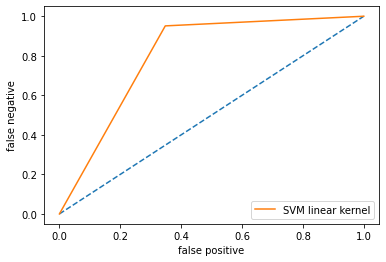

----------------------------------------------
The model  accuracy: 84.0 %
----------------------------------------------
The training time is:  10ms
----------------------------------------------
The f1 score is : 0.82
----------------------------------------------
The roc_auc_score is : 0.8
----------------------------------------------
The confusion matrix is :



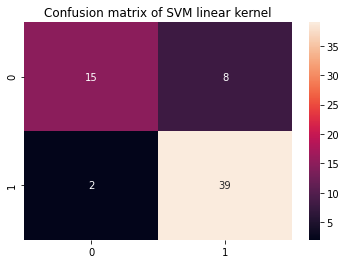

In [98]:
###################################################### Linear kernel ###########################################################
optimal_split_state1 = 0
maxAccuracy = 0
maxF1 = 0

# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 2000 for example 
# and remove the line 'optimal_split_state = 388628375' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------Hyperparameters tunning starts----------------------------------------\n\n')

for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+' Current f1 '+str(maxF1), end="\r")
    # Let's get the optimal C value for the linear kernal
    split_state = np.random.randint(1,1000000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)
    optimal_C = optimal_C_value()


    # Now let's use the optimal C value
    linear_clf = SVC(C=optimal_C,kernel='linear')

    # Let's train the model with the optimal C value and calculate the training time
    tic = time()
    linear_clf.fit(X_train, y_train)
    toc = time()
    time1 = str(round(1000*(toc-tic))) + "ms"
    y_linear = linear_clf.predict(X_test)
    linear_f1 = f1_score(y_test, y_linear, average='macro')
    linear_accuracy = accuracy_score(y_test, y_linear)*100
    if linear_accuracy>maxAccuracy and linear_f1>maxF1:
        maxAccuracy = linear_accuracy
        maxF1 = linear_f1
        optimal_split_state1 = split_state
        
# We've already tuned our hyperparameters, we will not repeat that as it takes soo long. 
# The optimal split state for linear kernel is 388628375
# Let's try that split state 
optimal_split_state1 = 388628375
X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
optimal_C = optimal_C_value()


# Now let's use the optimal C value
linear_clf = SVC(C=optimal_C,kernel='linear')

# Let's train the model with the optimal C value and calculate the training time
tic = time()
linear_clf.fit(X_train, y_train)
toc = time()
time1 = str(round(1000*(toc-tic))) + "ms"
y_linear = linear_clf.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_linear)*100
if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')

# Let's show the resuls
showResults(linear_accuracy, time1, y_linear,'SVM linear kernel')

**Polynomial Kernel :**

------------------------------------------------Results : SVM polynomial kernel -------------------------------------------------

 The ROC curve is :



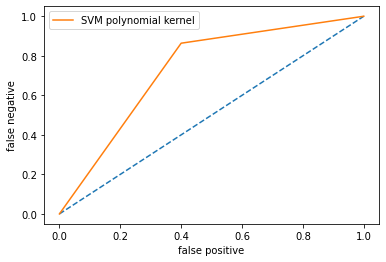

----------------------------------------------
The model  accuracy: 78.0 %
----------------------------------------------
The training time is:  7ms
----------------------------------------------
The f1 score is : 0.74
----------------------------------------------
The roc_auc_score is : 0.73
----------------------------------------------
The confusion matrix is :



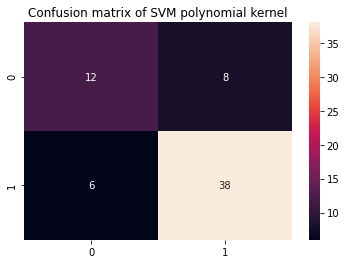

In [99]:
###################################################### Polynomial kernel #######################################################
optimal_split_state2 = 0
maxAccuracy = 0
maxF1 = 0


# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 500 for example 
# and remove the line 'optimal_split_state2 = 7070621' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------Hyperparameters tunning starts----------------------------------------\n\n')
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+', Current f1 '+str(maxF1), end="\r")
    
    split_state = np.random.randint(1,100000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)

    # Let's get the optimal C and the degree value for the polynomial kernal
    optimal_C, optimal_d = optimal_C_d_values()
    
    # Now let's use the optimal c value and the optimal degree value
    poly_clf = SVC(C=optimal_C,kernel='poly', degree=optimal_d)

    # Let's train the model with the optimal C value 
    poly_clf.fit(X_train, y_train)
    y_poly = poly_clf.predict(X_test)
    poly_f1 = f1_score(y_test, y_poly, average='macro')
    poly_accuracy = accuracy_score(y_test, y_poly)*100
    
    if poly_accuracy>maxAccuracy and poly_f1>maxF1:
        maxAccuracy = poly_accuracy
        maxF1 = poly_f1
        optimal_split_state2 = split_state

# We've already tuned our hyperparameters, we will not repeat that as it takes soo long. 
# The optimal split state for polynomial kernel is 7070621
# Let's try that split state 
optimal_split_state2 = 7070621

X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state2)

optimal_C, optimal_d = optimal_C_d_values()


# Now let's use the optimal C value
poly_clf = SVC(C=optimal_C,kernel='poly', degree=optimal_d)

# Let's train the model and calculate the training time
tic = time()
poly_clf.fit(X_train, y_train)
toc = time()
time2 = str(round(1000*(toc-tic))) + "ms"
y_poly = poly_clf.predict(X_test)
poly_accuracy = accuracy_score(y_test, y_poly)*100
if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')

# Let's show the resuls
showResults(poly_accuracy, time2, y_poly,'SVM polynomial kernel')

**Gaussian Kernel :**

------------------------------------------------Results : SVM gaussian kernel -------------------------------------------------

 The ROC curve is :



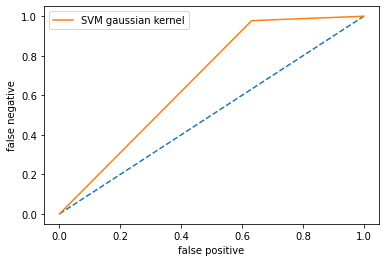

----------------------------------------------
The model  accuracy: 80.0 %
----------------------------------------------
The training time is:  5ms
----------------------------------------------
The f1 score is : 0.69
----------------------------------------------
The roc_auc_score is : 0.67
----------------------------------------------
The confusion matrix is :



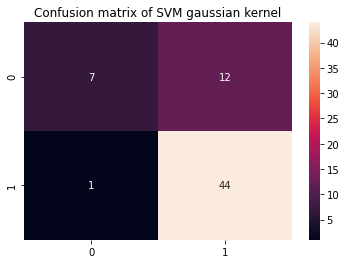

In [100]:
###################################################### Gaussian kernel ######################################################
optimal_split_state3 = 0
maxAccuracy = 0
maxF1 = 0


# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 500 for example 
# and remove the line 'optimal_split_state3 = 32987800' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------------Hyperparameters tunning starts'\
          '--------------------------------------------\n\n')
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+', Current f1 '+str(maxF1), end="\r")
    
    split_state = np.random.randint(1,100000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)

    # Let's get the optimal C and the degree value for the polynomial kernal
    optimal_C, optimal_gamma = optimal_C_gamma_values()
    
    # Now let's use the optimal c value and the optimal degree value
    gauss_clf = SVC(C=optimal_C,kernel='rbf',gamma=optimal_gamma)

    # Let's train the model with the optimal C value 
    gauss_clf.fit(X_train, y_train)
    y_gauss = gauss_clf.predict(X_test)
    gauss_f1 = f1_score(y_test, y_gauss, average='macro')
    gauss_accuracy = accuracy_score(y_test, y_gauss)*100
    
    if gauss_accuracy>maxAccuracy and gauss_f1>maxF1:
        maxAccuracy = gauss_accuracy
        maxF1 = gauss_f1
        optimal_split_state3 = split_state

# We've already tuned our hyperparameters, we will not repeat that as it takes soo long. 
# The optimal split state for polynomial kernel is 32987800
# Let's try that split state 
optimal_split_state3 = 32987800

X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state3)

optimal_C, optimal_gamma = optimal_C_gamma_values()


# Now let's use the optimal C value
gauss_clf = SVC(C=optimal_C,kernel='rbf',gamma=optimal_gamma)

# Let's train the model and calculate the training time
tic = time()
gauss_clf.fit(X_train, y_train)
toc = time()
time3 = str(round(1000*(toc-tic))) + "ms"
y_gauss = gauss_clf.predict(X_test)
gauss_accuracy = (accuracy_score(y_test, y_gauss)*100)

if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')
                                                                
# Let's show the resuls
showResults(gauss_accuracy, time3, y_gauss,'SVM gaussian kernel')

<h3>3) Comparison of the three svm kernels:</h3>

**We will compare all the metrics and plots one graph containing all the three ROC curves of the three SVM kernels :**

```python
# we will just call the function :
def compare_kernels()

```

------------------------------------------------ Comparison -----------------------------------------------------


    metrice      Linear kernel polynomial kernel gaussian kernel
---------------- ------------- ----------------- ---------------
   training time          10ms               7ms             5ms
                                                                
      accuracy %        84.375            78.125         79.6875
                                                                
confusion matrix       [15  8]           [12  8]         [ 7 12]
                       [ 2 39]           [ 6 38]         [ 1 44]
                                                                
        f1 score          0.82              0.74            0.69
                                                                
   roc_auc_score          0.80              0.73            0.67



The Roc curves :



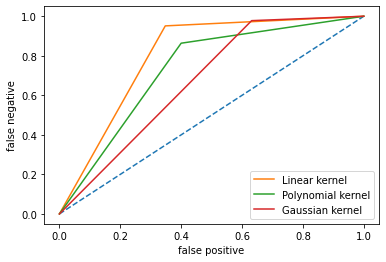

In [101]:
compare_kernels()

<h6>Conclusion :</h6>

- As you can see the **best svm kernel model is the one that used the linear kernel**, it performed very well on the test set as it has high accuracy as well as a high f1 score. 

- If you see the Roc curve you will notice that the orange curve is way above the blue dashed curve, this is why we got a high ROC score.

- We will choose the **linear kernel**.

<h3>4) The most accurate svm kernel is the linear kernel:</h3>

```python
# ust call the function :
def best_kernel("linear kernel"), 
#we give it the parameter "linear kernel" as it's it's the most accurate.

```

The choosen kernel : linear kernel
the training : 10ms
the accuracy : 84.0 %
the f1 score : 0.82
The roc_auc_score is : 0.8
----------------------------------------
The ROC curve :


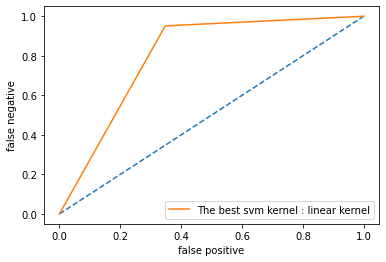

----------------------------------------
The confusion matrix is  :


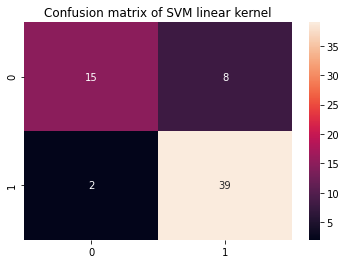

In [102]:
best_kernel('linear kernel')

<h3>5) Factors affecting performances of studens using SVM classifer :</h3>

- Before starting extracting factors affecting student performance let's talk about what a svm hypothesis look like :

$$h_{\theta}(x) = 
\begin{cases}
      1 & if& \theta^{T}.x > 0\\
      0 & &\text{otherwise}
    \end{cases} $$
    
In our problem $h_{\theta}(x) = 1$ means that the student that has the given informations x passed the exam.
  
Where x is our feature vector and $\theta$ is parameter learned when we called :
```python  
def ourClassifier.fit(Input_train, Output_train)

```
If you don't understand what is x, here it is :$x = \begin{bmatrix}
           school \\
           age \\
           address \\
           \vdots \\
           absences
         \end{bmatrix}
$
but do not forget that we've already numerized those values. <br><br>So $h_{\theta}(x) = \theta_{1}.school+\theta_{2}.age + \theta_{3}.address + ...\theta_{1}.absences$. <br><br>
This is a linear hypothesis of our features as we used a linear kernel. 

So if we want to predict an output of an input x we simply calculate $h_{\theta}(x)$ and see if it's grather than 0 or not.

We can extract this $\theta$ vector and see what components of this vector decide wheather of not $h_{\theta}(x)$ will be grather than 0 or not.

Let's explain how we will be able to know what factor for example will help students pass the final exam: 

- Suppose we have a hypothesis $h_{\theta}(x) = \theta_{1}.x_{1} + \theta_{2}.x_{2}$. If $\theta_{1}$ is grather, than 0 than a small positive change in $x_{1}$ will cause the value of $h_{\theta}(x)$ to rise, so the factor that affect our feature vector to belong to the positive class, y = 1, is simply $\theta_{1}$. But we have to extract also the factors affecting the negative class, y = 0.


We will do this by calling the following function :

```python
def factors(array, K, max_or_min, df)
```

Where :
- array is the $\theta$ components : $\theta_{1},\theta_{2},...,\theta_{n}$ where n is the number of features in x, in our case n = 30 .
- K : how many factors do we want
- max_or_min : min for negative class, max for positive class
- df : our numerised dataset.


<h4>The procedure :</h4>

- 1) get svm coefficients : $\theta_{1}, \theta_{2}, \theta_{3}, ... ,\theta_{n}$ by simply calling :
```python
    def coefs = classifier.coef_
```
- 2) convert those coefficients to understandable string. Example : $Fjob ---> Father's job$. To do that, just call :
```python
    def column_to_string(factors(coefs, K, minORmax, df),minORmax)
```
- <span style='color:red'>**Note that passing from svm coefficients to dataset column names is handled by** </span>:
```python
    def factors(...)
    # this function is used as parameter for
    def column_to_string(factors(...),minORmax)
    ...
```

    where **minORmax** : <br> 
    - '**min**' if we want factors leading students to failure
    - '**max**' if wa want factors helping students to success  



<h4 style='color:red'>Let's test our function :<h4>

In [103]:
coefs = linear_clf.coef_
column_to_string(factors(coefs, 4, 'max', df),'max')
column_to_string(factors(coefs, 4, 'min', df), 'min')

-----------------------------------------------------------------------------------
Factors helping students succeed :
guardian
wants to take higher education
studytime
father's job
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Factors leading students to failure
health
going out with friends
absences
failures


<h3> 6) Conclusion :</h3><br>

- For **<span style='color:red'>negative impact</span>**, it seems that the factors affecting students are: <br>

    - **Family educational support** : Children whose parents do not help them in school have many problems with exams.
    - **health** : students must keep in mind that a healthy mind is in a healthy body.
    - **going out with friends** : going out with friends helps relieve stress, but sometimes if the students spend a lot of time outside the home this will definitely affect their studies.
    - **age** : It is difficult to judge that the age is a negative factor, we do not have a big dataset to make a this kind of judgment.
<br><br>
- For **<span style='color:red'>positive impact</span>**, it seems that the factors helping students succeed: <br>

    - **Study time** : This is an import thing to keep in mind, students need to spend many hours studying, but this depends on many things such as the subject, timetable ...
    - **workday alcohol consumption** : 'to be reviewed'
    - **traveltime** : 'to be reviewed'
    - **father's education** : if the father has a higher education, he will help his children in their studies so that they do not struggle for a long time with their problems
    
<h6>Small conclusion of how the classifier performed on factors extraction:</h6>

- For negative impacts the classifier managed to give reasonable factors, but if we see the positive factors, two of them seems to be right,**Study time** and **father's education**, but the others,**traveltime** and **workday alcohol consumption**, isn't quits factors to take into consideration

# Comparison of the three algorithms